In [36]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
#from astroML.plotting import setup_text_plots
#import pdb
#setup_text_plots(fontsize=25, usetex=True)

mpl.rc('font',family='Times New Roman')
mpl.rcParams['font.size'] = 15.0

In [2]:
import colorpy

In [3]:
import colorpy.colormodels

In [4]:
import colorpy.plots

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
data = np.genfromtxt("spectra/earth_quadrature_radiance_refl.dat", skip_header=8)
earth_wl = data[:,0] * 1000.0 # Convert microns to nm
earth_I = data[:,1]
earth_Sun = data[:,2]
earth_R = data[:,3]

In [8]:
earthmask = (earth_wl > 350) & (earth_wl < 750)

In [11]:
earth = np.vstack([earth_wl[earthmask], earth_R[earthmask]]).T
earth.shape

(15238, 2)

Saving plot test.pdf


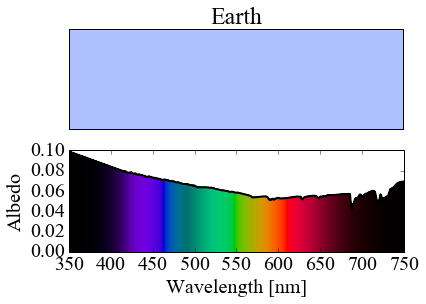

In [15]:
colorpy.plots.spectrum_plot(earth, "Earth", "test.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

In [19]:
data = np.genfromtxt("spectra/Mars_geo_albedo.txt")
mars_wl = data[:,0] * 1000.0 # Convert microns to nm
mars_A = data[:,1]
marsmask = (mars_wl > 350) & (mars_wl < 700)
mars = np.vstack([mars_wl[marsmask], mars_A[marsmask]]).T

Saving plot mars.pdf


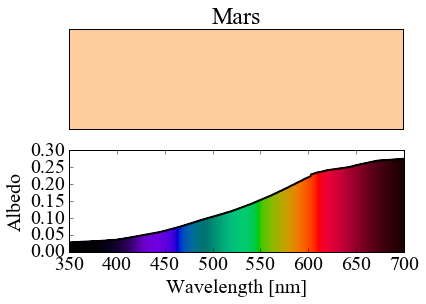

In [20]:
colorpy.plots.spectrum_plot(mars, "Mars", "mars.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

In [23]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
grass = np.vstack([wl[mask], A[mask]]).T

Saving plot grass.pdf


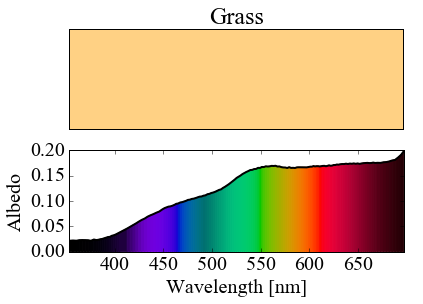

In [24]:
colorpy.plots.spectrum_plot(grass, "Grass", "grass.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot snow.pdf


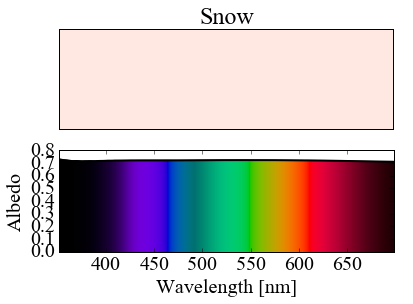

In [26]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
snow = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(snow, "Snow", "snow.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot redalgae.pdf


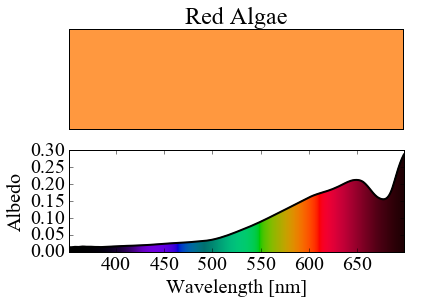

In [27]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
redalg = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(redalg, "Red Algae", "redalgae.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot conifers.pdf


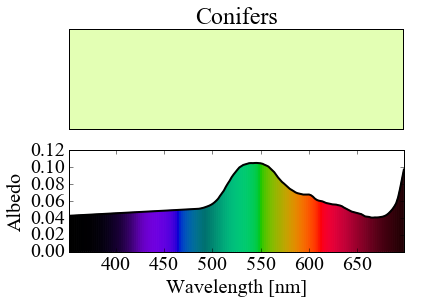

In [28]:
data = np.genfromtxt("spectra/conifers.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
conifers = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(conifers, "Conifers", "conifers.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot ocean.pdf


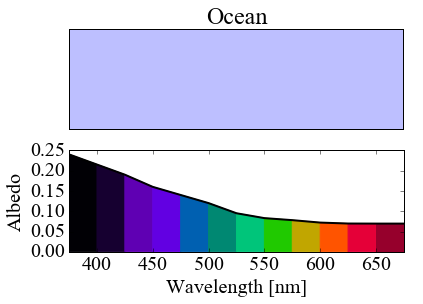

In [29]:
data = np.genfromtxt("spectra/ocean.alb", skip_header=26)
wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)
ocean = np.vstack([wl[mask], A[mask]]).T
colorpy.plots.spectrum_plot(ocean, "Ocean", "ocean.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

Saving plot sun.pdf


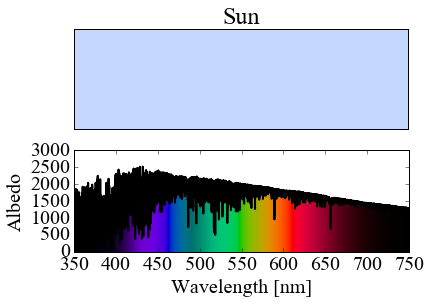

In [30]:
sun = np.vstack([earth_wl[earthmask], earth_Sun[earthmask]]).T
colorpy.plots.spectrum_plot(sun, "Sun", "sun.pdf", xlabel="Wavelength [nm]", ylabel="Albedo")

## Multiply Albedo by Solar Spectrum

Saving plot grass2.pdf


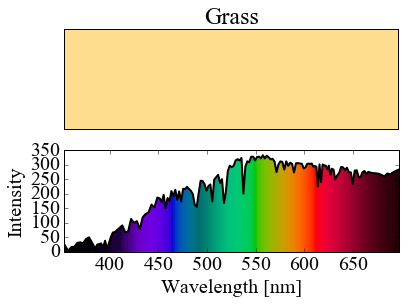

In [32]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

grass = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(grass, "Grass", "grass2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot snow2.pdf


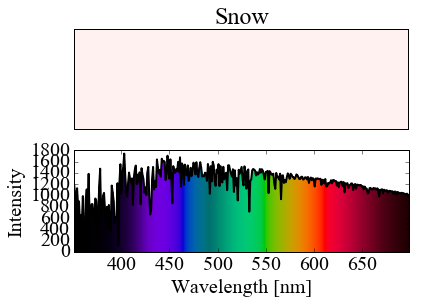

In [33]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

snow = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(snow, "Snow", "snow2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot mars2.pdf


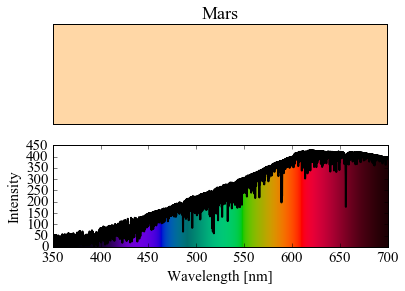

In [38]:
data = np.genfromtxt("spectra/Mars_geo_albedo.txt")

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

mars = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(mars, "Mars", "mars2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")

Saving plot redalgae2.pdf


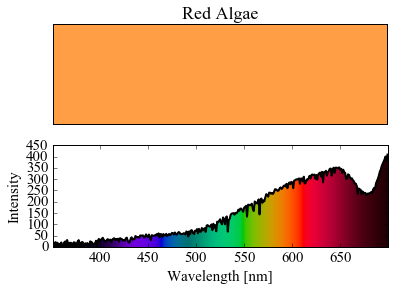

In [37]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)

wl = data[:,0] * 1000.0
A = data[:,1]
mask = (wl > 350) & (wl < 700)

# Interpolate sun to wl grid
F_solar = np.interp(wl, earth_wl, earth_Sun)
# Multiply Albedo and Flux
I = A * F_solar

redalgae = np.vstack([wl[mask], I[mask]]).T
colorpy.plots.spectrum_plot(redalgae, "Red Algae", "redalgae2.pdf", xlabel="Wavelength [nm]", ylabel="Intensity")